## Understanding Why People Vote

In August 2006 three researchers (Alan Gerber and Donald Green of Yale University, and Christopher Larimer of the University of Northern Iowa) carried out a large scale field experiment in Michigan, USA to test the hypothesis that one of the reasons people vote is social, or extrinsic, pressure. To quote the first paragraph of their 2008 research paper:

    Among the most striking features of a democratic political system is the participation of millions of voters in elections. Why do large numbers of people vote, despite the fact that ... "the casting of a single vote is of no significance where there is a multitude of electors"? One hypothesis is adherence to social norms. Voting is widely regarded as a citizen duty, and citizens worry that others will think less of them if they fail to participate in elections. Voters' sense of civic duty has long been a leading explanation of vote turnout...

In this homework problem we will use both logistic regression and classification trees to analyze the data they collected.

### The data
The researchers grouped about 344,000 voters into different groups randomly - about 191,000 voters were a "control" group, and the rest were categorized into one of four "treatment" groups. These five groups correspond to five binary variables in the dataset.

- "Civic Duty" (variable civicduty) group members were sent a letter that simply said "DO YOUR CIVIC DUTY - VOTE!"
- "Hawthorne Effect" (variable hawthorne) group members were sent a letter that had the "Civic Duty" message plus the additional message - - "YOU ARE BEING STUDIED" and they were informed that their voting behavior would be examined by means of public records.
- "Self" (variable self) group members received the "Civic Duty" message as well as the recent voting record of everyone in that household and a message stating that another message would be sent after the election with updated records.
- "Neighbors" (variable neighbors) group members were given the same message as that for the "Self" group, except the message not only had the household voting records but also that of neighbors - maximizing social pressure.
- "Control" (variable control) group members were not sent anything, and represented the typical voting situation.

Additional variables include sex (0 for male, 1 for female), yob (year of birth), and the dependent variable voting (1 if they voted, 0 otherwise).

### Exploration and Logistic Regression

In [1]:
gerber = read.csv("./dataset/gerber.csv")
str(gerber)

'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...


In [2]:
summary(gerber)

      sex              yob           voting         hawthorne    
 Min.   :0.0000   Min.   :1900   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:1947   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :1956   Median :0.0000   Median :0.000  
 Mean   :0.4993   Mean   :1956   Mean   :0.3159   Mean   :0.111  
 3rd Qu.:1.0000   3rd Qu.:1965   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1986   Max.   :1.0000   Max.   :1.000  
   civicduty        neighbors          self           control      
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :1.0000  
 Mean   :0.1111   Mean   :0.111   Mean   :0.1111   Mean   :0.5558  
 3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  

In [3]:
voted = subset(gerber, voting==1)
summary(voted)

      sex              yob           voting    hawthorne        civicduty     
 Min.   :0.0000   Min.   :1900   Min.   :1   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1945   1st Qu.:1   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :1954   Median :1   Median :0.0000   Median :0.0000  
 Mean   :0.4898   Mean   :1953   Mean   :1   Mean   :0.1133   Mean   :0.1106  
 3rd Qu.:1.0000   3rd Qu.:1962   3rd Qu.:1   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1986   Max.   :1   Max.   :1.0000   Max.   :1.0000  
   neighbors           self           control      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.1328   Mean   :0.1214   Mean   :0.5219  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [4]:
votedReg = glm(voting ~ hawthorne + civicduty + neighbors + self, data=gerber)
summary(votedReg)


Call:
glm(formula = voting ~ hawthorne + civicduty + neighbors + self, 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3780  -0.3145  -0.2966   0.6549   0.7034  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.296638   0.001061 279.525  < 2e-16 ***
hawthorne   0.025736   0.002601   9.896  < 2e-16 ***
civicduty   0.017899   0.002600   6.884 5.85e-12 ***
neighbors   0.081310   0.002601  31.263  < 2e-16 ***
self        0.048513   0.002600  18.657  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2153766)

    Null deviance: 74359  on 344083  degrees of freedom
Residual deviance: 74107  on 344079  degrees of freedom
AIC: 448180

Number of Fisher Scoring iterations: 2


In [5]:
voted_pred1 = predict(votedReg, type="response")
table(gerber$voting, voted_pred1 >= 0.3)

   
     FALSE   TRUE
  0 134513 100875
  1  56730  51966

In [6]:
accuracy = (134513 + 51966) / nrow(gerber)
accuracy

[1] 0.5419578

In [7]:
voted_pred1 = predict(votedReg, type="response")
table(gerber$voting, voted_pred1 >= 0.5)

   
     FALSE
  0 235388
  1 108696

In [8]:
accuracy = 235388 / nrow(gerber)
accuracy

[1] 0.6841004

In [9]:
library("ROCR")

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [10]:
ROCRpred =  prediction(voted_pred1, gerber$voting)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.5308461

### Trees

We will now try out trees. Build a CART tree for voting using all data and the same four treatment variables we used before. Don't set the option method="class" - we are actually going to create a regression tree here. We are interested in building a tree to explore the fraction of people who vote, or the probability of voting. We’d like CART to split our groups if they have different probabilities of voting. If we used method=‘class’, CART would only split if one of the groups had a probability of voting above 50% and the other had a probability of voting less than 50% (since the predicted outcomes would be different). However, with regression trees, CART will split even if both groups have probability less than 50%.

In [11]:
library("rpart")
library("rpart.plot")

In [12]:
CARTmodel = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber)

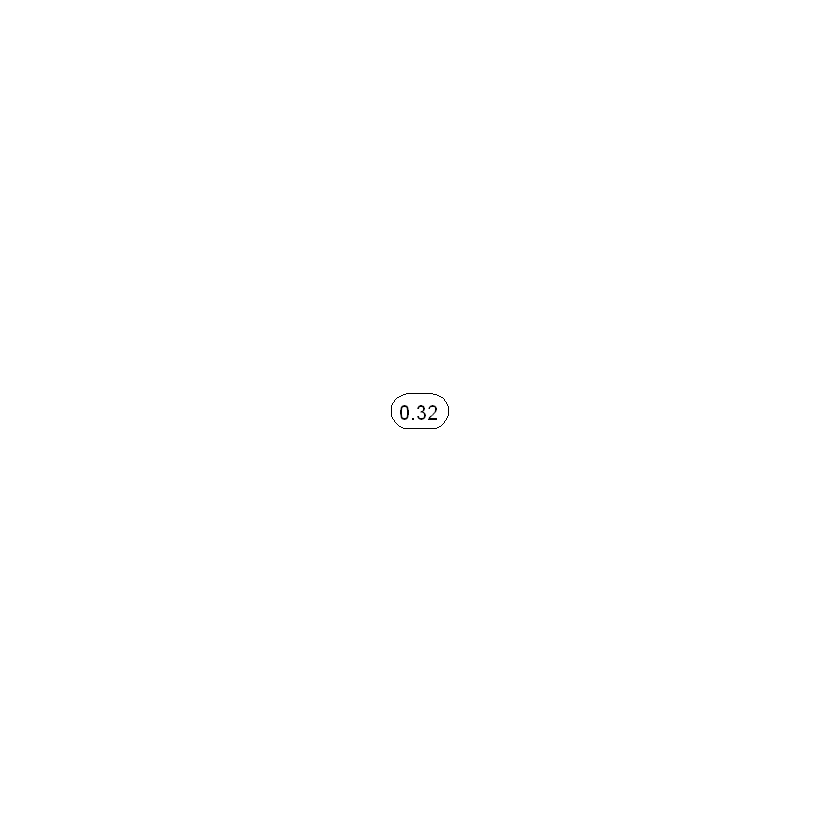

In [13]:
prp(CARTmodel)

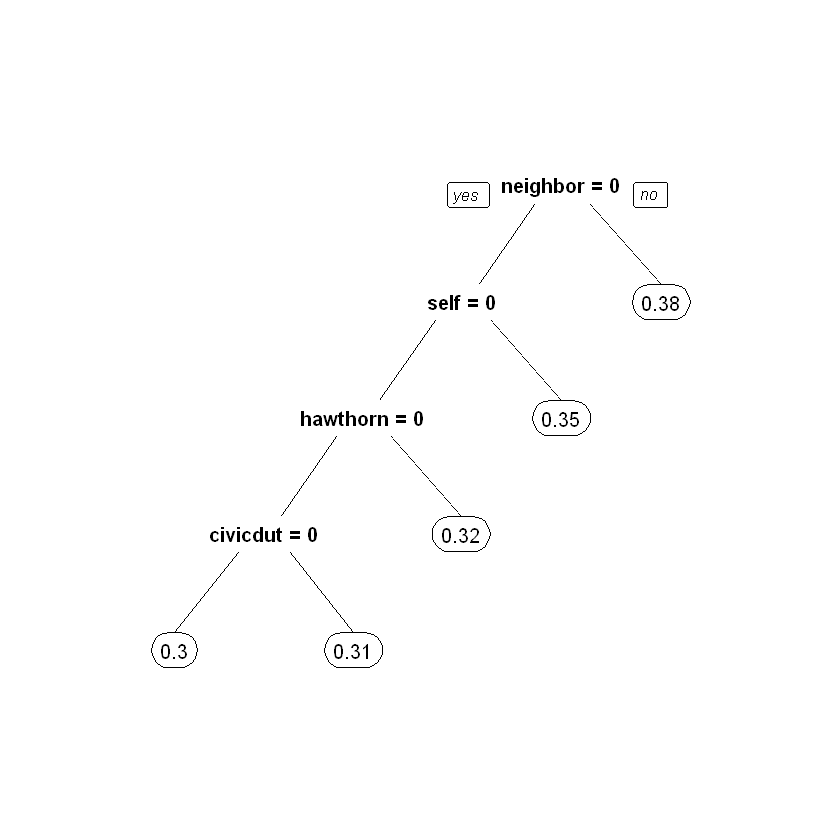

In [14]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)
prp(CARTmodel2)

In [15]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex, data=gerber, cp=0.0)

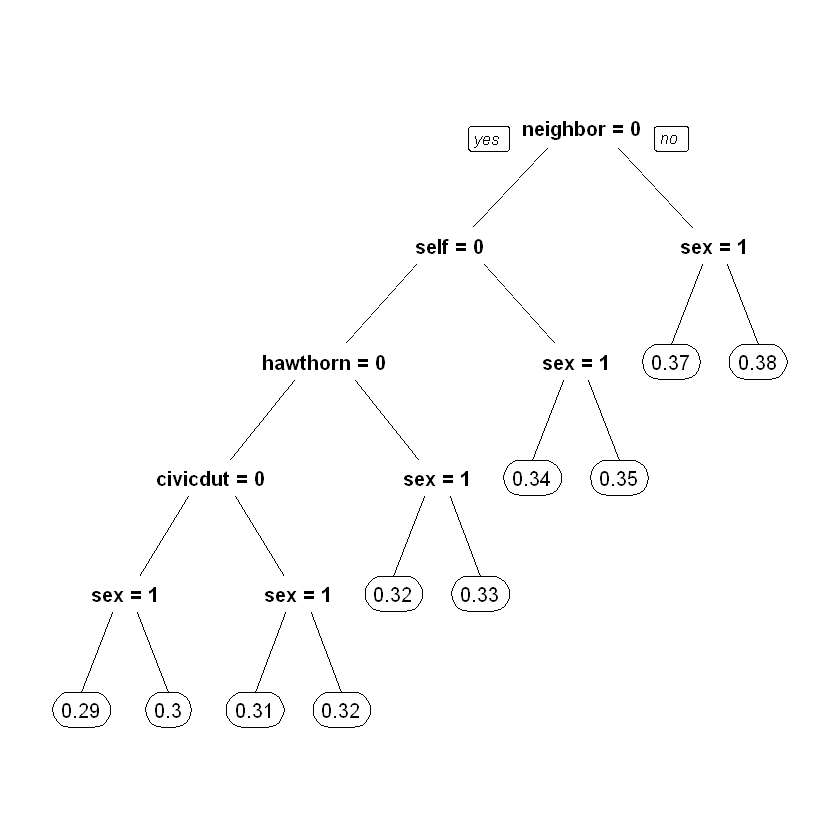

In [16]:
prp(CARTmodel3)

### Interaction Terms

We know trees can handle "nonlinear" relationships, e.g. "in the 'Civic Duty' group and female", but as we will see in the next few questions, it is possible to do the same for logistic regression. First, let's explore what trees can tell us some more.

Let's just focus on the "Control" treatment group. Create a regression tree using just the "control" variable, then create another tree with the "control" and "sex" variables, both with cp=0.0.

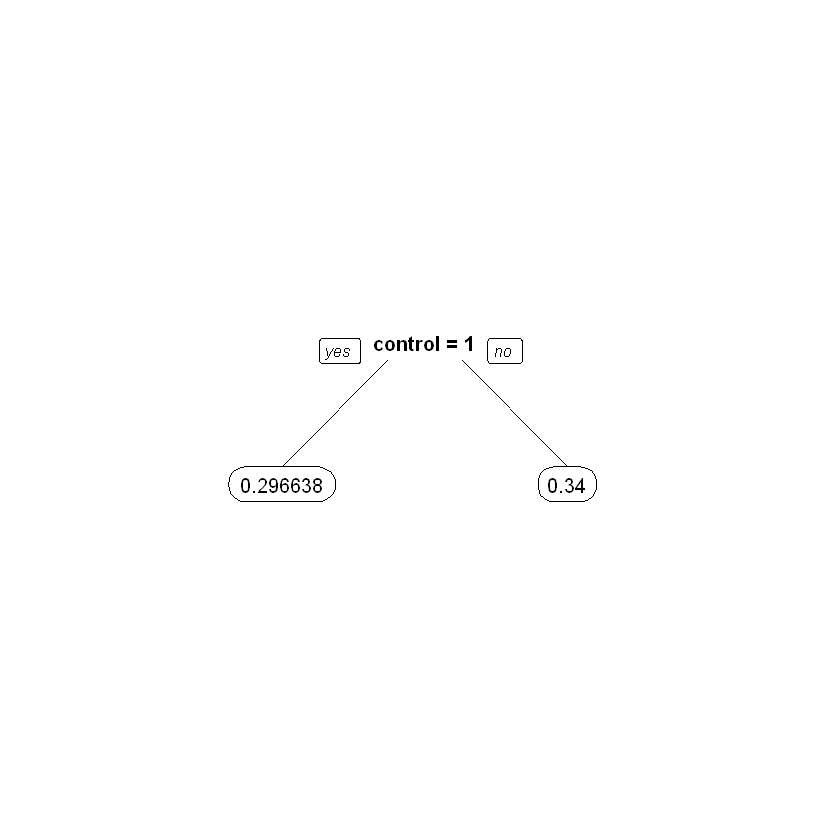

In [17]:
CARTcontrol = rpart(voting ~ control, data=gerber, cp=0.0)
prp(CARTcontrol, digits=6)

In [18]:
abs(0.34 - 0.296638)

[1] 0.043362

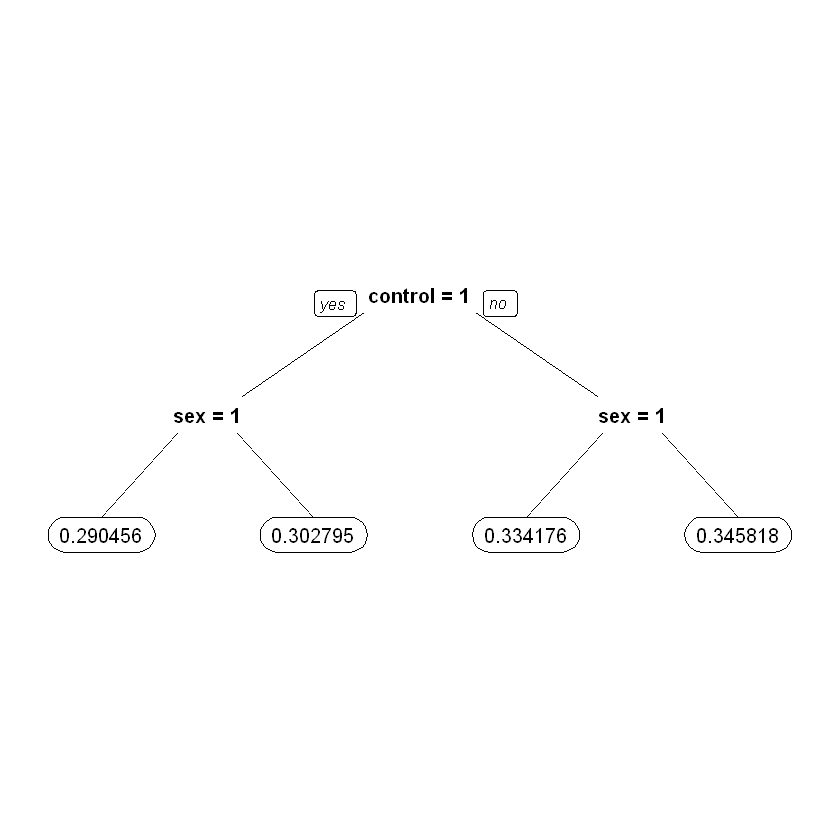

In [19]:
CARTsex = rpart(voting ~ control + sex, data=gerber, cp=0.0)
prp(CARTsex, digits=6)

In [20]:
0.345818 - 0.302795

[1] 0.043023

In [21]:
0.334176 - 0.290456

[1] 0.04372

In [22]:
summary(CARTsex)

Call:
rpart(formula = voting ~ control + sex, data = gerber, cp = 0)
  n= 344084 

            CP nsplit rel error    xerror        xstd
1 2.148067e-03      0 1.0000000 1.0000051 0.001350270
2 9.789151e-05      1 0.9978519 0.9978604 0.001353809
3 6.965512e-05      2 0.9977540 0.9978044 0.001353919
4 0.000000e+00      3 0.9976844 0.9977105 0.001354081

Variable importance
control     sex 
     93       7 

Node number 1: 344084 observations,    complexity param=0.002148067
  mean=0.3158996, MSE=0.216107 
  left son=2 (191243 obs) right son=3 (152841 obs)
  Primary splits:
      control < 0.5 to the right, improve=0.0021480670, (0 missing)
      sex     < 0.5 to the right, improve=0.0001664944, (0 missing)

Node number 2: 191243 observations,    complexity param=9.789151e-05
  mean=0.2966383, MSE=0.208644 
  left son=4 (95419 obs) right son=5 (95824 obs)
  Primary splits:
      sex < 0.5 to the right, improve=0.0001824261, (0 missing)

Node number 3: 152841 observations,    complexity pa

In [29]:
sexLogReg = glm(voting ~ sex + control, data=gerber, family='binomial')
summary(sexLogReg)


Call:
glm(formula = voting ~ sex + control, family = "binomial", data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


In [30]:
Possibilities = data.frame(sex=c(0,0,1,1),control=c(0,1,0,1))
predict(sexLogReg, newdata=Possibilities, type="response")

1         2         3         4 
0.3462559 0.3024455 0.3337375 0.2908065

In [31]:
abs(0.290456 - 0.2908065)

[1] 0.0003505

In [32]:
LogModel2 = glm(voting ~ sex + control + sex:control, data=gerber, family="binomial")
summary(LogModel2)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


In [33]:
predict(LogModel2, newdata=Possibilities, type="response")

1         2         3         4 
0.3458183 0.3027947 0.3341757 0.2904558

In [34]:
abs(0.290456 - 0.290455779247779)

[1] 2.207522e-07